# 综述
** 将异常的三簇星的lamost有效温度换成Tlusty **

_由于有一些星表中包含缺省项，我们需要使用pandas中使用dataframe读取csv中自动将缺省项补上的优势，来优化我们的自动化程式_

_(fits的文件我们可以使用topcat改变格式并且给星表瘦身，以加快程序读取速度）_

我们需要实现的功能包含以下几点：

输入：
* csv星表**_的名字_**
* 修正温度

输出：
* 新的星表




# 数据的引入和format (Alternative)

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import datetime
from scipy.optimize import curve_fit
%matplotlib inline

data_dir = '/Users/SY/Desktop/obic/data/'

In [17]:
starcatalog_fram = pd.read_csv(data_dir + 'lamost_8582.csv')
starcatalog_fram1 = pd.read_csv(data_dir + 'lamost_sfd_rest.csv')

starcatalog_fram_fil = starcatalog_fram.fillna(0)
starcatalog_fram_fil1 = starcatalog_fram1.fillna(0)

print(starcatalog_fram.columns)

Index(['TEFF', 'ERR_TEFF', 'RA_1', 'DEC_1', 'LOGG', 'ERR_LOGG', 'FEH',
       'ERR_FEH', 'SFD_ebv', 'ra_2', 'dec_2', 'teff_val', 'Teff_tlusty',
       'logg_tlusty'],
      dtype='object')


# 筛选数据

# 读入Teff logg color

In [18]:
teff_1 = starcatalog_fram_fil['TEFF'].values
teff_2 = starcatalog_fram_fil['teff_val'].values
teff_3 = starcatalog_fram_fil['Teff_tlusty'].values

logg_1 =starcatalog_fram_fil['LOGG'].values 
logg_2 =starcatalog_fram_fil['logg_tlusty'].values 

#starcatalog_fram_fil

## 挑出异常的源

In [20]:
sz = teff_1.shape


for i in range(sz[0]):
#     if (((int(teff_1[i]) >11600) & (int(teff_1[i]) <12000))\
#        |((int(teff_1[i]) >12300) & (int(teff_1[i]) <13200))):
    starcatalog_fram_fil['TEFF'].values[i] = starcatalog_fram_fil['Teff_tlusty'].values[i]

starcatalog_fram_fil=starcatalog_fram_fil[['TEFF','ERR_TEFF','RA_1','DEC_1','LOGG','ERR_LOGG','FEH','ERR_FEH','SFD_ebv']]

# 验证是否修正成功

[  1.00000000e+00   1.36902369e-12]  
1 x + 1.369e-12


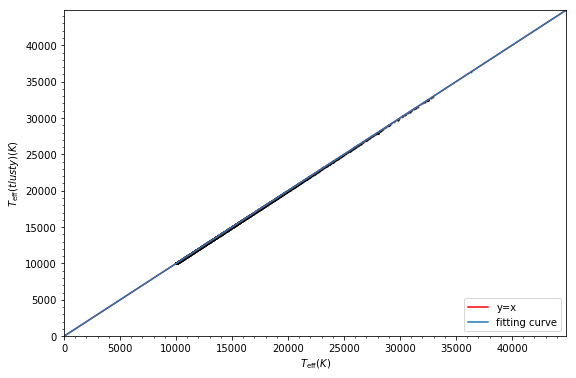

In [21]:
z1 = np.polyfit(teff_1, teff_3, 1)  #一次多项式拟合，相当于线性拟合
p1 = np.poly1d(z1)
print(z1,p1)



teffmax=np.max([np.max(teff_1),np.max(teff_3)])


x=np.linspace(0,teffmax,10000)
y1=z1[0]*x+z1[1]
y2=x


plt.figure(1,figsize=(9, 6))
plt.xlabel('$T_\mathrm{eff}(K)$')
plt.ylabel('$T_\mathrm{eff}(tlusty)(K)$')

plt.scatter(teff_1,teff_3,s=1,c='k',alpha=0.5)
#plt.scatter(teff1_err,teff3_err,s=1,c='violet')
plt.plot(x,y2,'r',label='y=x')
plt.plot(x,y1,label='fitting curve')
plt.xlim(0,teffmax)
plt.ylim(0,teffmax)

plt.minorticks_on()
plt.legend(loc='lower right')
#plt.savefig(savename1,dpi=200)
plt.show()

# 把修正完的源和剩余星表拼接

In [22]:
starcatalog_fram_fil.rename(columns={'RA_1': 'RA', 'DEC_1': 'DEC'}, inplace=True) 

In [23]:
result = starcatalog_fram_fil1.append(starcatalog_fram_fil)


In [24]:
result.to_csv(data_dir + 'new8582_lamost_sfd.csv',\
                        columns = ['TEFF','ERR_TEFF','RA','DEC','LOGG','ERR_LOGG','FEH','ERR_FEH','SFD_ebv'])


In [31]:
starcatalog_fram_fil

,TEFF,ERR_TEFF,RA_1,DEC_1,LOGG,ERR_LOGG,FEH,ERR_FEH,SFD_ebv
0,13384.98900,645.04030,307.284346,38.799747,3.744895,0.222319,0.419277,0.486275,3.738955
1,21846.18600,602.11053,306.869096,40.031677,3.282047,0.218515,0.353759,0.503485,13.684693
2,11609.61769,599.37000,307.846290,41.366230,3.626792,0.224803,0.097390,0.549914,3.140148
3,18691.82600,593.38960,308.427235,41.249065,3.589174,0.214889,0.469344,0.465637,5.734457
4,18455.56800,592.01294,307.682443,41.060516,3.365785,0.227812,-0.072893,0.558725,7.018244
5,21922.37000,600.35960,308.541691,41.052906,3.625908,0.224600,0.111241,0.549327,3.875671
6,20903.11100,556.80536,309.430132,42.542614,3.780385,0.221138,-0.044940,0.548930,5.246434
7,18821.59014,595.97906,305.842713,37.202133,3.555068,0.226642,0.003522,0.554781,3.930945
8,20220.43864,580.70250,307.427552,41.478138,3.662875,0.222216,0.082742,0.547274,6.905138
9,23602.03955,584.06714,309.627733,41.821033,3.744786,0.219660,0.213403,0.542055,5.383626
